<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statsmodels

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/macrodata.csv',
                 index_col=0,
                 parse_dates=True
                 )

In [103]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


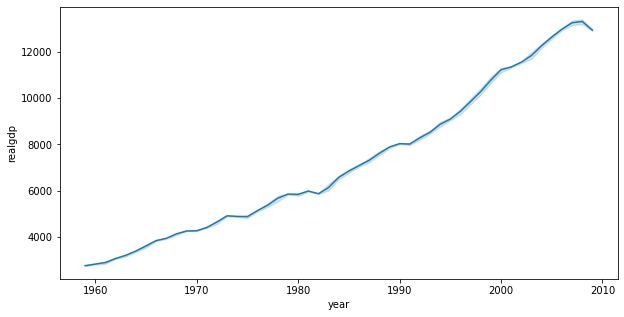

In [104]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,y='realgdp',x='year')
plt.show()

In [105]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [106]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [107]:
df['cycle'] = gdp_cycle

In [108]:
df['trend']= gdp_trend

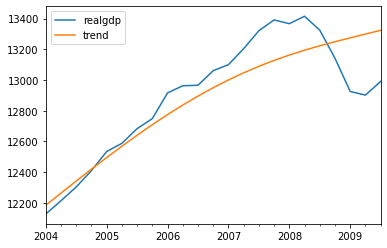

In [109]:
df[['realgdp','trend']]['2004':].plot()

In [110]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                 index_col=0,
                parse_dates=True
                 )

In [111]:
df.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [112]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [113]:
gdp_cycle, gdp_trend = hpfilter(df,lamb=1600)

In [114]:
df['cycle'] = gdp_cycle

In [115]:
df['trend']= gdp_trend

In [116]:
df

,Thousands of Passengers,cycle,trend
Month,,,
1949-01-01,112,-8.625586,120.625586
1949-02-01,118,-3.651911,121.651911
1949-03-01,132,9.327155,122.672845
1949-04-01,129,5.319286,123.680714
1949-05-01,121,-3.673675,124.673675
...,...,...,...
1960-08-01,606,124.325492,481.674508
1960-09-01,508,23.453495,484.546505
1960-10-01,461,-26.164925,487.164925


In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [118]:
results = seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')

In [119]:
df['trend2']  = results.trend


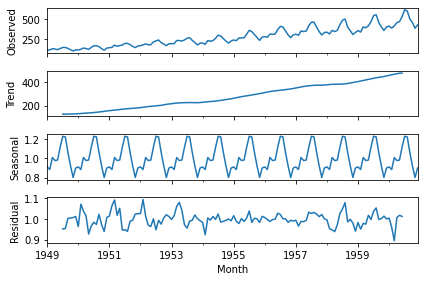

In [120]:
results.plot();

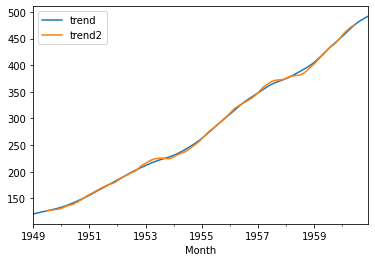

In [121]:
df['trend trend2'.split()].plot()

#EWMA Exponentially Weighted Moving Average

In [122]:
df.index = pd.to_datetime(df.index)

In [123]:
df.drop('cycle',axis=1,inplace=True)

In [124]:
df['6-month-SMA']= df['Thousands of Passengers'].rolling(window=6,center=True).mean()

In [125]:
df['12-month-SMA']= df['Thousands of Passengers'].rolling(window=12,center=True).mean()

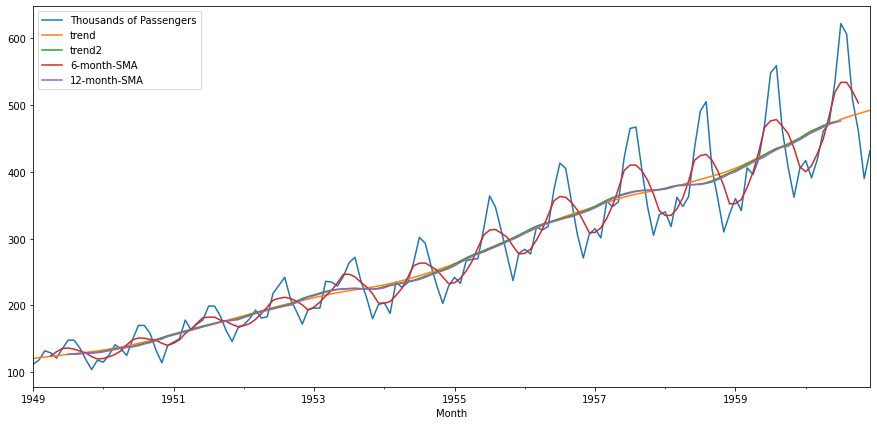

In [126]:
df.plot(figsize=(15,7))

In [127]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

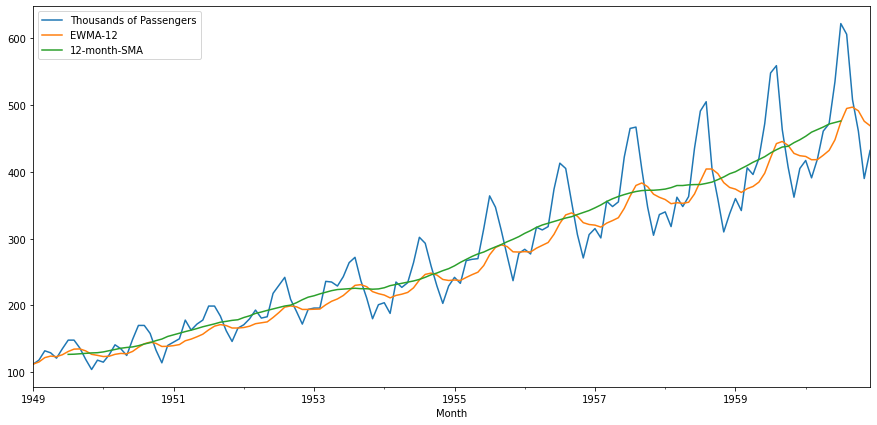

In [128]:
df[['Thousands of Passengers','EWMA-12','12-month-SMA' ]].plot(figsize=(15,7))

# Holt winters

In [129]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                 index_col=0,
                parse_dates=True
                 )

In [130]:
df = df.dropna()

In [131]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [132]:
df.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [133]:
df.index.freq='MS'

In [134]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [135]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [136]:
span=12
alpha = 2/(span+1)

In [137]:
#df['EWMA-12-true'] = df['Thousands of Passengers'].ewm(span=12).mean()

In [138]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

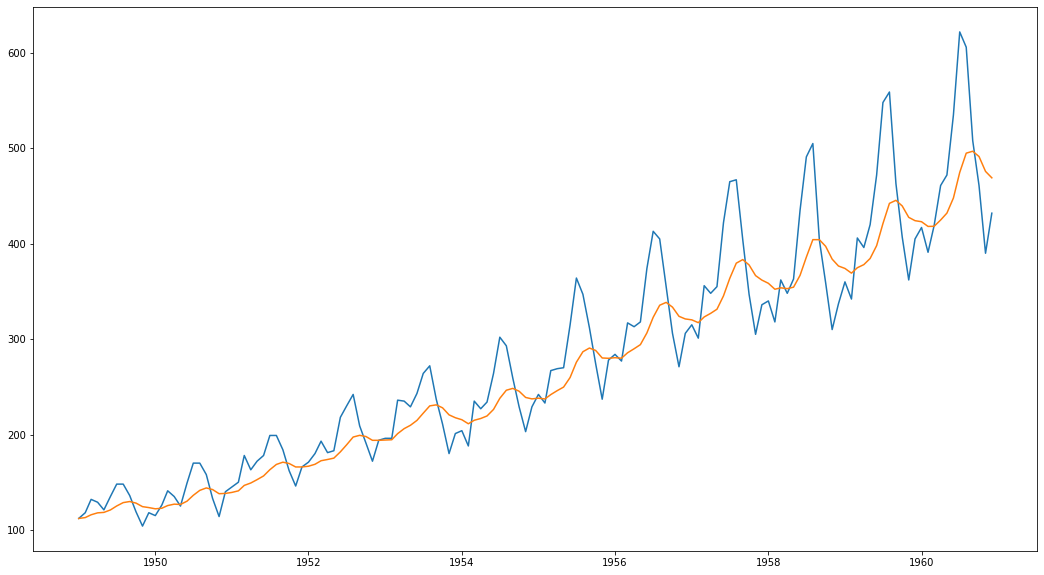

In [139]:
plt.figure(figsize=(18,10))
plt.plot(df)


In [142]:
model= SimpleExpSmoothing(df['Thousands of Passengers'])

In [144]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [145]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [148]:
df['Holt'] = fitted_model.fittedvalues.shift(-1)

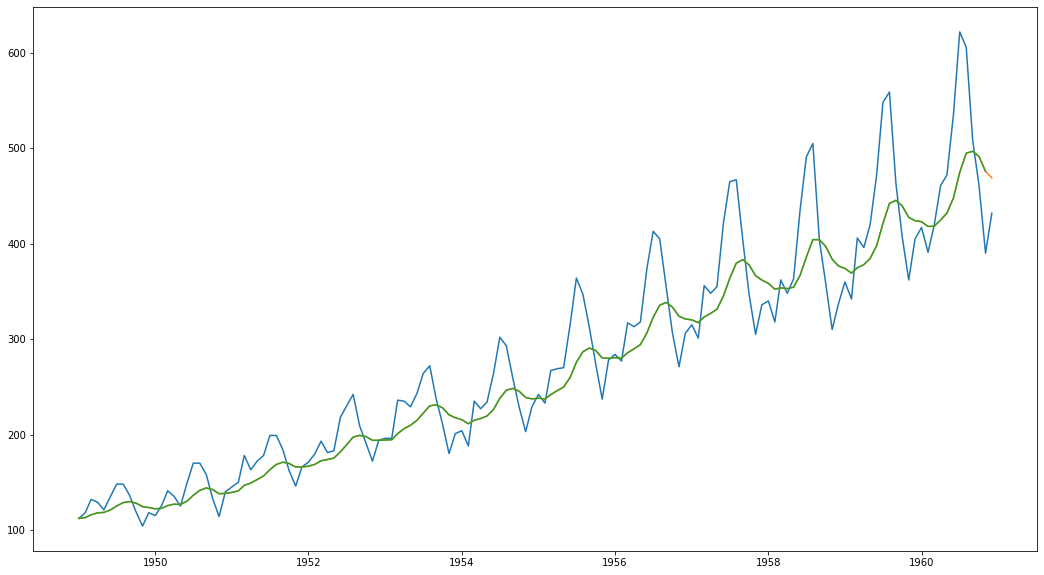

In [150]:
plt.figure(figsize=(18,10))
plt.plot(df)

In [151]:
df

,Thousands of Passengers,EWMA12,Holt
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [167]:
model= ExponentialSmoothing(df['Thousands of Passengers'],trend='add')
model= ExponentialSmoothing(df['Thousands of Passengers'],trend='mul')

In [168]:
fitted_model = model.fit()

In [169]:
fitted_model.fittedvalues

Month
1949-01-01    111.915888
1949-02-01    112.049247
1949-03-01    118.051885
1949-04-01    132.058041
1949-05-01    129.056722
                 ...    
1960-08-01    622.273496
1960-09-01    606.266460
1960-10-01    508.223369
1960-11-01    461.202703
1960-12-01    390.171484
Freq: MS, Length: 144, dtype: float64

In [170]:
df['double_add_12'] = fitted_model.fittedvalues.shift(-1)

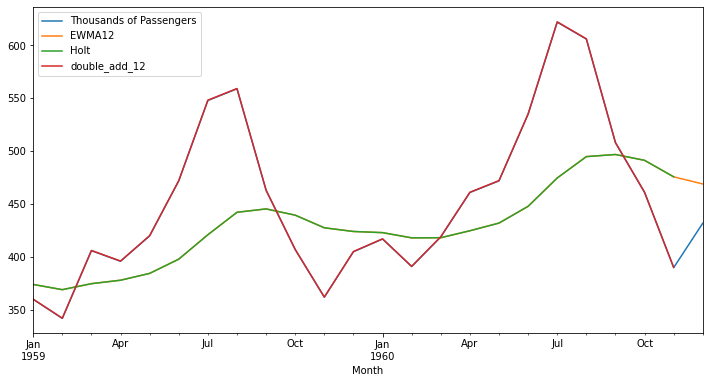

In [175]:
df.iloc[-24:].plot(figsize=(12,6))

In [181]:
model= ExponentialSmoothing(df['Thousands of Passengers'],
                            trend='mul',
                            seasonal='mul',
                            seasonal_periods=12)
fitted_model = model.fit()
df['triple_mul_12'] = fitted_model.fittedvalues

In [182]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'Holt', 'double_add_12',
       'triple_mul_12'],
      dtype='object')

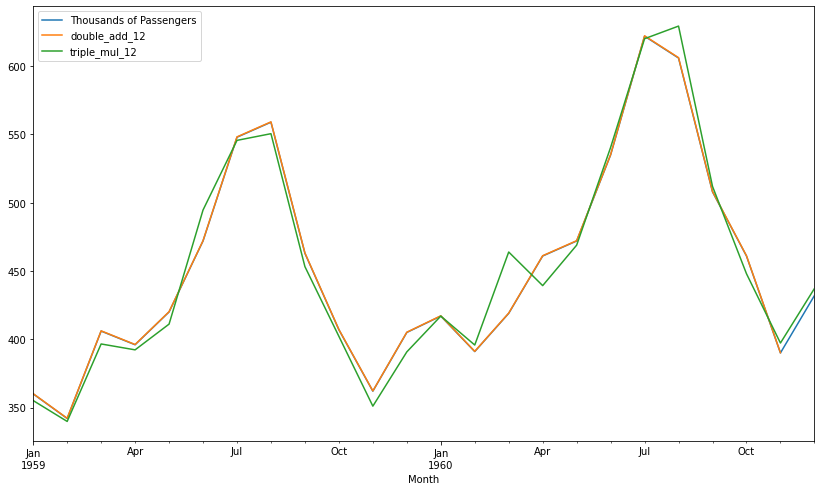

In [191]:
df.iloc[-24:][['Thousands of Passengers', 
    'double_add_12',
       'triple_mul_12'
       ]].plot(figsize=(14,8))